In [243]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.manifold import TSNE

In [244]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [245]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [246]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Предобработка данных

## Загрузка данных

In [247]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Баланс классов

<function matplotlib.pyplot.show(close=None, block=None)>

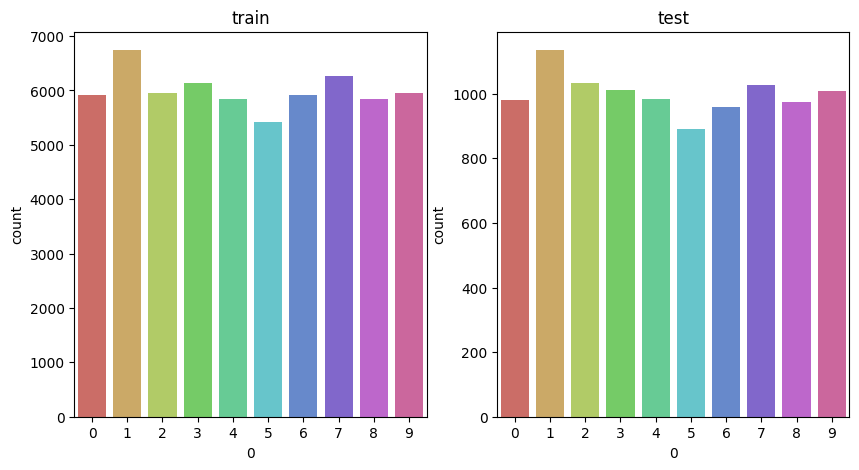

In [248]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=0, data=pd.DataFrame(y_train), palette='hls', ax=ax[0])
ax[0].set_title('train')
sns.countplot(x=0, data=pd.DataFrame(y_test), palette='hls', ax=ax[1])
ax[1].set_title('test')
plt.show

## Нормализация

In [249]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## t-SNE

In [250]:
data = []
for i in range(len(x_test)):
    data.append(np.ravel(x_test[i]).tolist())
flatt_df = pd.DataFrame(data)

In [251]:
tsne = TSNE(random_state=42, init='pca', n_iter=300).fit_transform(flatt_df)

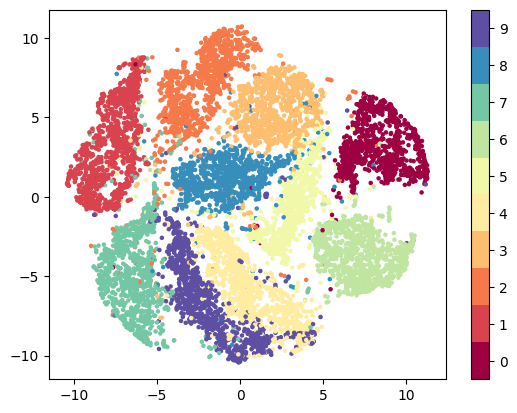

In [252]:
plt.scatter(tsne[:, 0], tsne[:, 1], s=5, c=y_test, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

## Категориальные признаки

In [253]:
y_train = pd.get_dummies(pd.DataFrame(y_train)[0]).to_numpy()
y_test = pd.get_dummies(pd.DataFrame(y_test)[0]).to_numpy()

In [254]:
print(f"Train dataset shape: {x_train.shape}, {y_train.shape}")
print(f"Test dataset shape:  {x_test.shape}, {y_test.shape}")

Train dataset shape: (60000, 28, 28), (60000, 10)
Test dataset shape:  (10000, 28, 28), (10000, 10)
